**Authors:** Judith Ludwig and Florent Schaffhauser, Uni-Heidelberg, Summer Semester 2024

# Bases

## Kernel and range

### Solving linear systems

Let us consider the following linear system of two equations and four variables:
$$ 
\left\{
\begin{array}{rcl}
x + y - z + 5t & = & 2 \\
-y + 3z & = & -1 
\end{array}
\right.
$$

We can ask *Sage* to solve it for us. Note that we must declare the variables *and* specify what variables to solve for. Note also that *Sage* will introduce parameters automatically if they are needed. If you want more information, you can type `solve?` in a code cell and run it. As usual, the `show` command is optional.

In [1]:
x, y, z, t = var( "x, y, z, t" )
show( solve( [ x + y - z + 5*t == 2, y-3*z == 1 ], [ x,y,z,t ]) )

[[x == -5*r1 - 2*r2 + 1, y == 3*r2 + 1, z == r2, t == r1]]

In this example, *Sage* has introduced two parameters. This means that the system of equations that we were considering has a solution and that this solution is non-unique. Without more information, we can hardly say more. For instance, it is unclear if the parameters are to be taken as rational, real or complex numbers. In fact, the `solve` command is not related to linear systems and could be used to solve other types of equations.

In [2]:
solve( cos(x) == 0, x )

[x == 1/2*pi]

Let us write the previous linear system in matrix form:
$$
\begin{pmatrix}
1 & 1 & -1 & 5 \\
0 & -1 & 3 & 0
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z \\
t
\end{pmatrix}
=
\begin{pmatrix}
2 \\
-1
\end{pmatrix}
$$
We can declare the matrix in *Sage* and apply Gaussian reduction to it.

In [4]:
A = matrix( QQ, [ [ 1, 1, -1, 5 ], [ 0, -1, 3, 0 ] ])
show( A.echelon_form() )

[ 1  0  2  5]
[ 0  1 -3  0]

As we can see, the reduced row-echelon form of $ A $ has two columns without a pivot (the third column and the fourth column). This means that the variables corresponding to these columns (in this case, the third and fourth variables, i.e. $ z $ and $ t $) are *free variables* and that they will be used as parameters. Mathematically, this tells us that $$ \dim \ker A = 2 $$ i.e. that $ \ker A $ **is a $2$-dimensional subspace of** $ \mathbb{Q}^4 $.

This is something that *Sage* is able to tell us, but in a slightly different terminology.

In [5]:
A.right_kernel()

Vector space of degree 4 and dimension 2 over Rational Field
Basis matrix:
[    1     0     0  -1/5]
[    0     1   1/3 -2/15]

There are several remarks to be made:
1. To *Sage*, the expression "Vector space of degree 4 and dimension 2 over Rational field" means "$2$-dimensional subspace of $ \mathbb{ Q }^4 $".
1. The function `right_kernel()` applied to matrix $ A $ means the space of *column* vectors $ X $ such that $ A X = 0 $, which in mathematics we just call *kernel*. If we use the function `kernel()`, it is interpreted by *Sage* as `left_kernel()`, which means the space of *row* vectors $ X $ such that $ X A = 0 $ (which, as a vector space, is isomorphic to $ \ker \,^t A $).
1. *Sage* also returns automatically a basis of $ \ker A $, which is presented as a family of row vectors. However, we should think of them as column vectors.

In [6]:
# The following function returns the dimension of the kernel
A.right_nullity()

2

In [7]:
# We get a slightly different presentation of the kernel of A if we use show()
show( A.right_kernel() )

Vector space of degree 4 and dimension 2 over Rational Field
Basis matrix:
[    1     0     0  -1/5]
[    0     1   1/3 -2/15]

In [8]:
# We can transform the row vectors of the basis of ker A into column vectors
B = A.right_kernel().basis()
v1 = column_matrix( B[0] )
v2 = column_matrix( B[1] )
show( v1, v2 )

[   1]
[   0]
[   0]
[-1/5] [    0]
[    1]
[  1/3]
[-2/15]

In [9]:
# We can also check that the vectors v1, v2 lie in ker A
A * v1 == 0, A * v2 == 0

(True, True)

Note that the system that we wanted to solve in the first place was not a homogeneous system:
$$
\begin{pmatrix}
1 & 1 & -1 & 5 \\
0 & -1 & 3 & 0
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z \\
t
\end{pmatrix}
=
\begin{pmatrix}
2 \\
-1
\end{pmatrix}
$$
To find the solutions we should form the augmented matrix and apply Gaussian reduction to the latter.

In [12]:
y = vector( QQ, [ 2, -1 ] )
M = A.augment( y, subdivide = True )
show( M )

[ 1  1 -1  5| 2]
[ 0 -1  3  0|-1]

In [13]:
show( M.echelon_form() )

[ 1  0  2  5| 1]
[ 0  1 -3  0| 1]

The reduced row-echelon form of $ M $ shows that the system 
$ A X = 
\begin{pmatrix} 
2 \\ 
-1 
\end{pmatrix}
$ admits solutions (no inconsistent equation of the form $ 0x + 0y + 0z + 0t = 1 $). In what follows, we shall denote by $ Y $ the vector $ Y = \begin{pmatrix} 
2 \\ 
-1 
\end{pmatrix} $.

The general theory of linear systems then tells us that the set of solutions of the non-homogeneous system $ A X = Y $ is the affine subspace $$ X_0 + \ker A = \{ X_0 + H : H \in \ker A \} $$
where $ X_0 $ is an arbitrary solution of $ A X = Y $. This affine space has the same dimension as the vector space $ \ker A $.

**Proof.** 

Let $ X_0 \in \mathbb{Q}^4$ satisfy $ A X_0 = Y $.

Then for all $ H \in \ker A $, we have 
$$ A( X_0 + H )= A X_0 + A H = Y + 0 = Y $$ 
so the vector $ X_0 + H $ is indeed a solution of the equation $ A X = Y $. 

Conversely, if $ X_1 \in \mathbb{Q}^4$ satisfies $ A X_1 = Y $ then 
$$ A ( X_1 - X_0 ) = A X_1 - A X_0 = Y - Y = 0 $$
so the vector $ H := X_1 -X_0 \in \ker A $ and we have indeed $ X_1 = X_0 + H $.

Since we already know a basis of $ \ker A $, in order to completely solve the system $ A X = Y $, it suffices to find one vector $ X_0 $ such that $ A X_0 = Y $. This can also be done using *Sage*.

In [14]:
# We ask Sage for one solution of the system AX = Y
x0 = A.solve_right(y)
x0, A*x0 == y 

((1, 1, 0, 0), True)

We have thus found a parameterisation of the space of solutions of the system $ A X = Y $, namely $ X \in \mathbb{ Q }^4 $ satisfies $ A X = Y $ if and only if there are rational numbers $ a_1, a_2 \in \mathbb{ Q } $ such that 
$$ X = X_0 + a_1 v_1 + a_2 v_2 $$
where $ ( v_1, v_2 ) $ is the basis of $ \ker A $ determined earlier using *Sage*.

In [15]:
# We construct column vectors, for convenience later on
X0 = column_matrix( x0 )
Y = column_matrix( y )
show( X0, Y )

[1]
[1]
[0]
[0] [ 2]
[-1]

In [18]:
# Note that the following verification is performed symbolically
a1, a2 = var( " a1 a2 " )
X = X0 + a1 * v1 + a2 * v2
A*X == Y

True

In [19]:
# We can display the vector X nicely by using a few tricks
from IPython.display import Latex as tex

In [20]:
tex( f" $$ X = X_0 + a_1 v_1 + a_2 v_2 = {latex(X0)} + a_1 {latex(v1)} + a_2 {latex(v2)} = {latex(X)} $$ " )

<IPython.core.display.Latex object>

### The span of a family of vectors

A basic problem in linear algebra is to compute the dimension of a subspace $ W $ of a given finite-dimensional vector space $ V $. 

We illustrated this in the previous section with the example of $ \ker A $, where $ A $ is an $ m \times n $ matrix. In that case, if $ A $ has entries in $ \mathbb{Q} $, say, then $ \ker A $ is a subspace of $ \mathbb{Q}^n $. But we can also study the subspace $ \mathrm{Im} \, A \subset \mathbb{ Q }^m $, which is generated by the columns of $ A $ (which is why $ \mathrm{Im} \, A $ is also called the *column space* of $ A $). 

A natural question is how to *extract a basis for the column space* from the family of all columns of $ A $. This can be achieved using the reduced row-echelon form of $ A $ and of course it gives us as a byproduct the dimension of $ \mathrm{Im} \, A $, also called the *rank* of $ A $.

In [16]:
# Let us retake the previous matrix A
show(A)

[ 1  1 -1  5]
[ 0 -1  3  0]

In [21]:
# We have seen that dim ker A = 2, so the rank of A is 4 - 2 = 2.
A.rank()

2

In [24]:
# This is reflected in the reduced row-echelon form of A
# The rank of A is equal to the number of the number of pivots in A1
A1 = A.echelon_form()
show(A1)

[ 1  0  2  5]
[ 0  1 -3  0]

In [25]:
# The following function returns the indices of columns of A1 containing pivots
A1.pivots()

(0, 1)

In [26]:
# We can list the columns of A as vectors using the following function
A.columns()

[(1, 0), (1, -1), (-1, 3), (5, 0)]

So the *first and second columns* of $ A $ form a basis of the column space of $ A $. And the third column of $ A $ is equal to twice the first one minus three times the second, while the fourth one is equal to five times the first. Can you read this information off the reduced row-echelon form of $ A $ ?

In [27]:
# We check that the subspace generated by the first two columns of A is equal
# to the whole column space
span( [ vector( A[:,i] ) for i in A1.pivots() ] ) == span( [ v for v in A.columns() ] )

True

In [28]:
# Here is an indication of how we can express the third and fourth columns of A
# as a linear combination of the basis that we have just found
A[:,2] == A1[0,2] * A[:,0] + A1[1,2] * A[:,1]
# Can you do something similar for A[:,3]?

True

We have therefore extracted, from the family of columns of $ A $, a sub-family which is a basis of the column space of $ A $. In the example above, this column space is all of $ \mathbb{ Q }^2 $, so we cannot complete that basis to a basis of the ambient space.

Let us consider instead the transpose of $ A $ and the subspace $ \mathrm{ Im } \, \,^t A \subset \mathbb{ Q }^4 $.

In [31]:
C = A.transpose()
show(C)
W = span( [ v for v in C.columns() ] )
# Note that Sage computes a basis of W that is *not* a subset of the set of columns 
# (also, Sage writes this basis as rows)
W

[ 1  0]
[ 1 -1]
[-1  3]
[ 5  0]

Vector space of degree 4 and dimension 2 over Rational Field
Basis matrix:
[ 1  0  2  5]
[ 0  1 -3  0]

In [32]:
# But in fact, the two columns of C are linearly independent
C.rank()

2

In [33]:
# So we can just take these two columns as a basis of the space they generate
C.columns()

[(1, 1, -1, 5), (0, -1, 3, 0)]

In order to complete this basis of the column space of $ C $ to a basis of $ \mathbb{ Q }^4 $, we can add to it the vectors of the canonical basis of $ \mathbb{ Q }^4 $ and extract from this overly large family (six vectors in a four-dimensional space) a basis of the space that they generate (which is all of $ \mathbb{ Q }^4 $) by using the same method as earlier.

In [34]:
D = column_matrix(C.augment(identity_matrix(4)).columns())
D1 = D.echelon_form()
show( D, D1 )

[ 1  0  1  0  0  0]
[ 1 -1  0  1  0  0]
[-1  3  0  0  1  0]
[ 5  0  0  0  0  1] [    1     0     0     0     0   1/5]
[    0     1     0     0   1/3  1/15]
[    0     0     1     0     0  -1/5]
[    0     0     0     1   1/3 -2/15]

In [35]:
# We can represent the completed basis as the columns of a matrix
E = D.matrix_from_columns( [ i for i in D1.pivots() ] )
show( E )

[ 1  0  1  0]
[ 1 -1  0  1]
[-1  3  0  0]
[ 5  0  0  0]

In [36]:
# The columns of E indeed form a basis of QQ^4
E.rank()

4

In [37]:
# Or we can just list the vectors in the completed basis
[ D.column(i) for i in D1.pivots() ]

[(1, 1, -1, 5), (0, -1, 3, 0), (1, 0, 0, 0), (0, 1, 0, 0)]

### Exercises

**Exercise 1.** Find a basis of the kernel of the matrix
$$ B = 
\left(\begin{array}{rrrrrr}
1 & 3 & -2 & 0 & 2 & 0 \\
2 & 6 & -5 & -2 & 4 & -3 \\
0 & 0 & 5 & 10 & 0 & 15 \\
2 & 6 & 0 & 8 & 4 & 18
\end{array}\right)
\in \mathrm{Mat}( 4 \times 6; \mathbb{Q} )
$$ 
and find a parameterisation of the space of solutions of the system 
$$ B X =
\left(
\begin{array}{r}
-1 \\
-3 \\
5 \\
2 
\end{array}
\right)
.$$


In [30]:
# For convenience, I input B here
B = matrix( QQ, [ [ 1 , 3 , -2 , 0 , 2 , 0], 
                 [ 2 , 6 , -5 , -2 , 4 , -3],
                 [ 0 , 0 , 5 , 10 , 0 , 15 ],
                 [ 2 , 6 , 0 , 8 , 4 , 18] ] )
show( B )

[ 1  3 -2  0  2  0]
[ 2  6 -5 -2  4 -3]
[ 0  0  5 10  0 15]
[ 2  6  0  8  4 18]

**Exercise 2.** Extract from the family defined by the columns of $B$ a basis of the column space of $ B $ and express the remaining columns of $ B $ as a linear combination of the columns in that basis.

**Exercise 3.** Explore the commands `row_space()` and `column_space()` and figure out how they work. How is the basis of the row space obtained? And the basis of the column space?

## Diagonalisation

### Eigenvalues and eigenvectors

Let $ A \in \mathrm{Mat}( n \times n; \mathbb{k} ) $ be a square matrix. Recall that an *eigenvalue* of $A$ is an element $a\in \mathbb{k}$
such that there exists a non-zero vector $X \in \mathbb{k}^n$ such that 
$$AX= aX.$$ 
The vector $X$ is then called an *eigenvector* for $A$. 

We can define diagonalisability of a square matrix as follows.

**Definition.** Let $ \mathbb{ k } $ be a field and let $ n > 0 $ be an integer. A matrix $ A \in \mathrm{Mat}( n \times n; \mathbb{ k } )$ is called **diagonalisable over** $ \mathbb{ k } $ if there exists a pair of matrices $ ( D, P ) $ in $ \mathrm{Mat}( n \times n; \mathbb{ k } ) $ such that:
1. $ D $ is diagonal.
1. $ P $ is invertible.
1. $ A P = P D $.

The last equality means that, for all $ j \in \{ 1; \ldots ; n \} $, the $ j $-th column of $ P $ is an eigenvector for $ A $, associated to the $ j $-th diagonal coefficient $ d_j $ of $ D $: 
$$ \forall \ j \in \{ 1; \ldots ; n \},  A C_j( P ) = d_j C_j( P ) $$
where 
$$ D = 
\left( 
\begin{array}{rrr}
d_1 & & \\
& \ddots & \\
& & d_n
\end{array}
\right)
$$
and $$ P = \left[ C_1(P), \ldots , C_n(P) \right] .$$

We then have the following criterion of diagonalisability.

**Theorem.** A matrix $ A \in \mathrm{Mat}( n \times n; \mathbb{k} ) $ is diagonalisable over $ \mathbb{ k } $ if and only if its characteristic polynomial 
$$ f_A( t ) := \det( t I_n - A ) $$
splits into a product of linear factors
$$ f_A( t ) = ( t - a_1 )^{ m_1} \ldots ( t - a_r )^{ m_r }, \ a_j \in \mathbb{ k } $$
and
$$ \forall \ j \in \{ 1; \ldots ; r \}, \ \dim \ker( A - a_j I_n ) = m_j .$$ 

In other words, $ A $ is diagonalisable over $ \mathbb{ k } $ if and only if its characteristic polynomial $ f_A( t ) $ splits over $ \mathbb{ k } $ and *the geometric multiplicity of $ a_j $ as an eigenvalue of $ A $ is equal to its algebraic multiplicity as a root of $ f_A( t ) $*.

We will now see how to apply this theorem using `Sage`. Note that sometimes the characteristic polynomial of $ A $ is defined as $ \det( A - t I_n ) $, which is equal to $ ( -1 )^n \times f_A( t ) $ with $ f_A( t ) $ as above. We have chosen to follow Sage's convention here.

In [39]:
# Example 1
A = matrix(QQ, [[2,0,4],[3,-4,12],[1,-2,5]])
f_A = A.charpoly("t")
show( f_A )

t^3 - 3*t^2 + 2*t

In [32]:
# We can factorise f_A
show( f_A.factor() )

(t - 2) * (t - 1) * t

In [40]:
# And its roots are indeed the eigenvalues of A
ev_A = A.eigenvalues()
show( ev_A )


[2, 1, 0]

In [41]:
# If we want to find eigenvectors, we need to compute ker( A - a I_3 ) for all eigenvalues a
I = identity_matrix(3)
for a in ev_A:
    print((A - a*I).right_kernel().basis())

[
(1, 1/2, 0)
]
[
(1, 0, -1/4)
]
[
(1, -3/4, -1/2)
]


In [43]:
# Each eigenspace is 1-dimensional here, and we can construct the matrix P easily
P = matrix( QQ, 3, 3)
i = 0
for a in ev_A:
    vec_a = (A - a*I).right_kernel().basis()[0]
    P[:,i] = column_matrix( vec_a )
    i = i + 1
show( P )

[   1    1    1]
[ 1/2    0 -3/4]
[   0 -1/4 -1/2]

In [44]:
# Likewise, we can easily construct the matrix D in this case
D = matrix( QQ, 3, 3 )
i=0
for a in ev_A:
    D[i,i] = a
    i = i + 1
show( D )

[2 0 0]
[0 1 0]
[0 0 0]

In [37]:
# We check that A is indeed diagonalisable
A*P == P*D

True

In [45]:
# In fact, Sage can do all of this for us
D1, P1 = A.eigenmatrix_right()
show( D1, P1 )

[2 0 0]
[0 1 0]
[0 0 0] [   1    1    1]
[ 1/2    0 -3/4]
[   0 -1/4 -1/2]

In [46]:
# Another way to get information on the eigenspaces of A is as follows
show( A.eigenvectors_right() )

[(2,
  [
  (1, 1/2, 0)
  ],
  1),
 (1,
  [
  (1, 0, -1/4)
  ],
  1),
 (0,
  [
  (1, -3/4, -1/2)
  ],
  1)]

The first term in the triple above means that $ 2 $ is an eigenvalue of $ A $, that the vector $ \left( 1, \frac{1}{2}, 0 \right) $ is a basis for the eigenspace $ \ker( A - 2 I_3 ) $, and that $ 2 $ has algebraic multiplicity $ 1 $. And similarly for the other two terms.

In [47]:
# Example 2, with multiple eigenvalues
A = matrix(QQ, [[2,-3,1],[1,-2,1],[1,-3,2]])
f_A = A.charpoly("t")
show( f_A.factor() )

t * (t - 1)^2

In [48]:
# Sage can show us the eigenvalues of A, counted with
# their respective (algebraic) multiplicities
show( A.eigenvalues() )

[0, 1, 1]

In [49]:
# Similarly, it can show us eigenvectors for A
show( A.eigenvectors_right() )

[(0,
  [
  (1, 1, 1)
  ],
  1),
 (1,
  [
  (1, 0, -1),
  (0, 1, 3)
  ],
  2)]

The second term in the pair above means that $ 1 $ is an eigenvalue of $ A $ and that the family 
$$ \left( 
\left(
\begin{array}{r}
1 \\ 
0 \\
-1 
\end{array}
\right)\left(
\begin{array}{r}
0 \\ 
1 \\
3 
\end{array}
\right)
\right)
$$
is a basis for the eigenspace $ \ker( A - I_3 ) $, which therefore has dimension $ 2 $, the same as the algebraic multiplicity of the eigenvalue $ 1 $ for $ A $.

In [43]:
D, P  = A.eigenmatrix_right()
show( D, P )

[0 0 0]
[0 1 0]
[0 0 1] [ 1  1  0]
[ 1  0  1]
[ 1 -1  3]

In [44]:
# Example 3: a matrix whose characteristic polynomial splits but which is not diagonalisable over QQ
A = matrix( QQ, 3, 3, [ -4, 0, -2, 0, 1, 0, 5, 1, 3 ] )
show( A.charpoly(t).factor() )

(t + 2) * (t - 1)^2

In [45]:
# 1 is an eigenvalue of geometric multiplicity 1 but algebraic multiplicity 2
show(A.eigenvectors_right())


[(-2,
  [
  (1, 0, -1)
  ],
  1),
 (1,
  [
  (1, 0, -5/2)
  ],
  2)]

In [46]:
# Do not get fooled by the information that the command A.eigenmatrix_right() returns!
show( A.eigenmatrix_right() )
# The third column of the right matrix is 0, so that matrix is not invertible...

(
[-2  0  0]  [   1    1    0]
[ 0  1  0]  [   0    0    0]
[ 0  0  1], [  -1 -5/2    0]
)

### Extension of the base field

Sometimes, a matrix which is not diagonalisable over a given field ($ \mathbb{ R } $ for instance) can become diagonalisable if it is seen as a matrix with entries in a larger field (for instance $ \mathbb{ C } $).

In [47]:
# Example 4: A matrix which is not diagonalisable over QQ but yes over QQbar
A = matrix(QQ, [ [ -1, 1, 0 ], [ 0, -1, 1 ], [ 1, 0, -1 ] ] )
f_A = A.charpoly("t")
show( f_A.factor() )

t * (t^2 + 3*t + 3)

In [48]:
# The roots() command shows the roots of f_A that lie in the same field as the coefficients
f_A.roots()

[(0, 1)]

The above means that $ 0 $ is a root of multiplicity $ 1 $ of $ f_A( t ) $, and it is the only rational root of that polynomial.

In [49]:
# We can ask Sage to look for roots in the usual algebraic closure of QQ
f_A.roots(QQbar)

[(0, 1),
 (-1.500000000000000? - 0.866025403784439?*I, 1),
 (-1.500000000000000? + 0.866025403784439?*I, 1)]

We have obtained two more roots, each one of multiplicity $ 1 $. This is not very convenient for us, though, because the roots are presented as complex numbers $ a + i b $, with $ a, b \in \mathbb{ R } $, but in `Sage` real numbers are of type `float` and this is not appropriate for *symbolic computation*. Fortunately, we can ask `Sage` to work in look for roots of $ f_A $ in the **Symbolic Ring**.

In [58]:
# Now we can see the roots of f_A in an appropriate way
show( f_A.roots( SR ) )

[(-1/2*I*sqrt(3) - 3/2, 1), (1/2*I*sqrt(3) - 3/2, 1), (0, 1)]

In [59]:
# Another method to do so:
P_A = f_A.change_ring(SR)
show( P_A.roots() )

[(-1/2*I*sqrt(3) - 3/2, 1), (1/2*I*sqrt(3) - 3/2, 1), (0, 1)]

In [60]:
# In fact, we can change the base ring of A and use the same methods as earlier
B = A.change_ring(SR)
D, P = B.eigenmatrix_right() 
show( D, P )

[-1/2*I*sqrt(3) - 3/2                    0                    0]
[                   0  1/2*I*sqrt(3) - 3/2                    0]
[                   0                    0                    0] [                   1                    1                    1]
[-1/2*I*sqrt(3) - 1/2  1/2*I*sqrt(3) - 1/2                    1]
[ 1/2*I*sqrt(3) - 1/2 -1/2*I*sqrt(3) - 1/2                    1]

In [61]:
# We check that B is indeed diagonalisable over QQbar 
# (or over SR, according to Sage)
B*P == P*D

True

### Exercises

**Exercise 1.** Using the matrix 
$$ A = \left(\begin{array}{rrr}
2 & -3 & 1 \\
1 & -2 & 1 \\
1 & -3 & 2
\end{array}\right)
$$ 
as an example, write a piece of `Sage` code that constructs, from the list of eigenvalues of $ A $, a basis of each eigenspace. 

*Indication:* Compare this to what was done for Example 1 in the paragraph about Diagonalisation. The difficulty is that now we have an eigenvalue of algebraic multiplicity equal to $ 2 $.

**Exercise 2.** Give an example of a $ 2 \times 2 $ matrix with rational entries and that is diagonalisable over $ \mathbb{ R } $ but not over $ \mathbb{ Q } $.

**Exercise 3.** Study the code below. It starts with a definition that generates a random $n\times n$ matrix. 
Then it makes a set of $10$ such matrices. Then it plots all the eigenvalues of these matrices. Play with the setup and with the numbers, e.g. plot the eigenvalues of $500$ real $8\times 8$ matrices. Describe the resulting plot. What do you observe? Can you explain your observations mathematically?

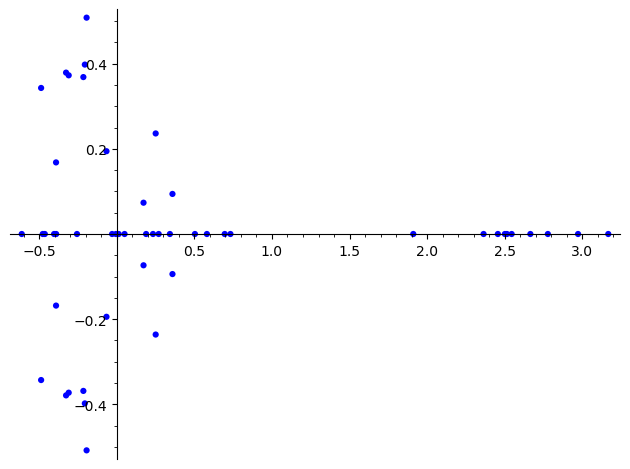

In [63]:
# Define a random nxn matrix with real entries 
def generate_random_real_matrix(n):
    return random_matrix(RR, n, distribution='uniform', min=0, max=1)

# Generate 10 random real 5x5 matrices
matrices = [generate_random_real_matrix(5) for _ in range(10)]

# Plot eigenvalues of all matrices
points = []
for matrix in matrices:
    eigenvalues = matrix.eigenvalues()
    points.extend([(eigenvalue.real(), eigenvalue.imag()) for eigenvalue in eigenvalues])

points_plot = point(points, color='blue', size=20, marker='o')
points_plot.show()

## Projects

### Complement of a subspace and adapted bases

In this project, you are asked to write a `Sage` or `Python` program that:
1. Asks the user to input an integer $ n $ and family of vectors in the vector space $ E = \mathbb{Q}^n $.
1. Extracts from this family a basis of the subspace $ F $ generated by these vectors.
1. Complete this basis to a basis of $ \mathbb{ Q }^n $ and extract from it a basis of an explicit complement of $ F $ in $ \mathbb{ Q }^n $.

### Diagonalisability

In this project, you are asked to build on Exercise 1 of the Section about Matrices of linear transformations and write a program that:
1. Asks the user to input a square matrix $ A $.
1. Returns a small explanatory paragraph saying what the eigenvalues of $ A $ are, with their respective algebraic and geometric multiplicities, and saying whether $ A $ is diagonalisable (by applying the theorem recalled in these notes)
1. In case $ A $ is diagonalisable, returns matrices $ D $ and $ P $ such that $ A P = P D $.
1. In case $ A $ is not diagonalisable, lets the user know if $ A $ is diagonalisable over an extension of the base field.

---